In this notebook, we'll examine the UCI electricity demand dataset (see [here][0]), and set up a dataframe that can be used for time series prediction testing. 

[0]:https://archive.ics.uci.edu/dataset/321/electricityloaddiagrams20112014

Note that this notebook is for documentation only, the model data can be updated by running `zero-time-series-demo prep ----model-data-pipeline`

In [1]:
%load_ext autoreload
%autoreload 2

# Load Data

In [2]:
from zero_ts_demo.imports import *
from zero_ts_demo import helpers as hp
from zero_ts_demo.load_data import load_model_data

In [3]:
MODEL_DATA = load_model_data()
df = MODEL_DATA.copy()
df.head()

,mt_004,mt_005,mt_006,mt_007,mt_009,mt_010,mt_011,mt_013,mt_014,mt_015,...,mt_360,mt_361,mt_362,mt_363,mt_364,mt_365,mt_366,mt_367,mt_368,mt_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prophet

In [4]:
from zero_ts_demo import models as md
from copy import deepcopy as copy
from zero_ts_demo.models import ProphetModel

/home/zero/miniconda3/envs/prophet-early-leather/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# fit model for a sample of columns
TAIL = 1000 # set to something like 1000 to fit on that many rows, set to zero to train on all data
SAMPLE_COLS = pd.Series(df.columns).sample(15, random_state=42).tolist()

07:30:41 - cmdstanpy - INFO - Chain [1] start processing
07:30:41 - cmdstanpy - INFO - Chain [1] done processing


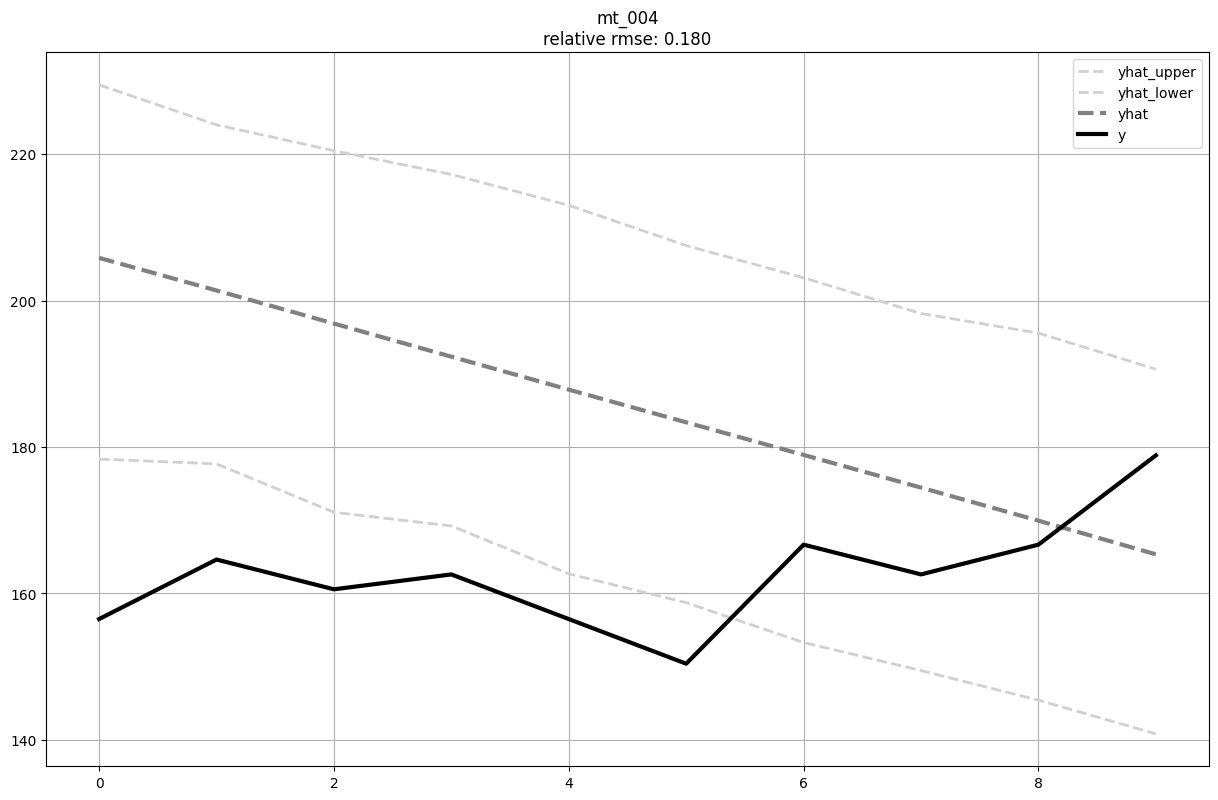

In [14]:
col = df.columns[0]
sl_train, sl_test = md.train_test(MODEL_DATA, col, tail=TAIL)
model = ProphetModel(sl_train=sl_train, sl_test=sl_test, title=col)
model.fit_predict()
fig = model.plot_preds()
fig

In [7]:
graphs = dict()
models = dict()

for col in SAMPLE_COLS:
    sl_train, sl_test = md.train_test(MODEL_DATA, col, tail=TAIL)
    model = ProphetModel(sl_train=sl_train, sl_test=sl_test, title=col)
    model.fit_predict()
    fig = model.plot_preds()
    models[col] = copy(model)
    graphs[col] = fig

07:28:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
07:28:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
07:28:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
07:28:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
07:28:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
07:28:52 - cmdstanpy - INFO - Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
07:28:53 - cmdstanpy - INFO - Chain [1] start processing
07:28:53 - cmdstanpy - INFO - Chain [1] done processing
07:28:53 - cmdstanpy - INFO - Chain [1] start processing
07:28:53 - cmdstanpy - INFO - Chain [1] done processing
07:28:53 - cmdstanpy - INFO - Chain [1] start processing
07:28:53 - cmdstanpy - INFO - Chain [1]

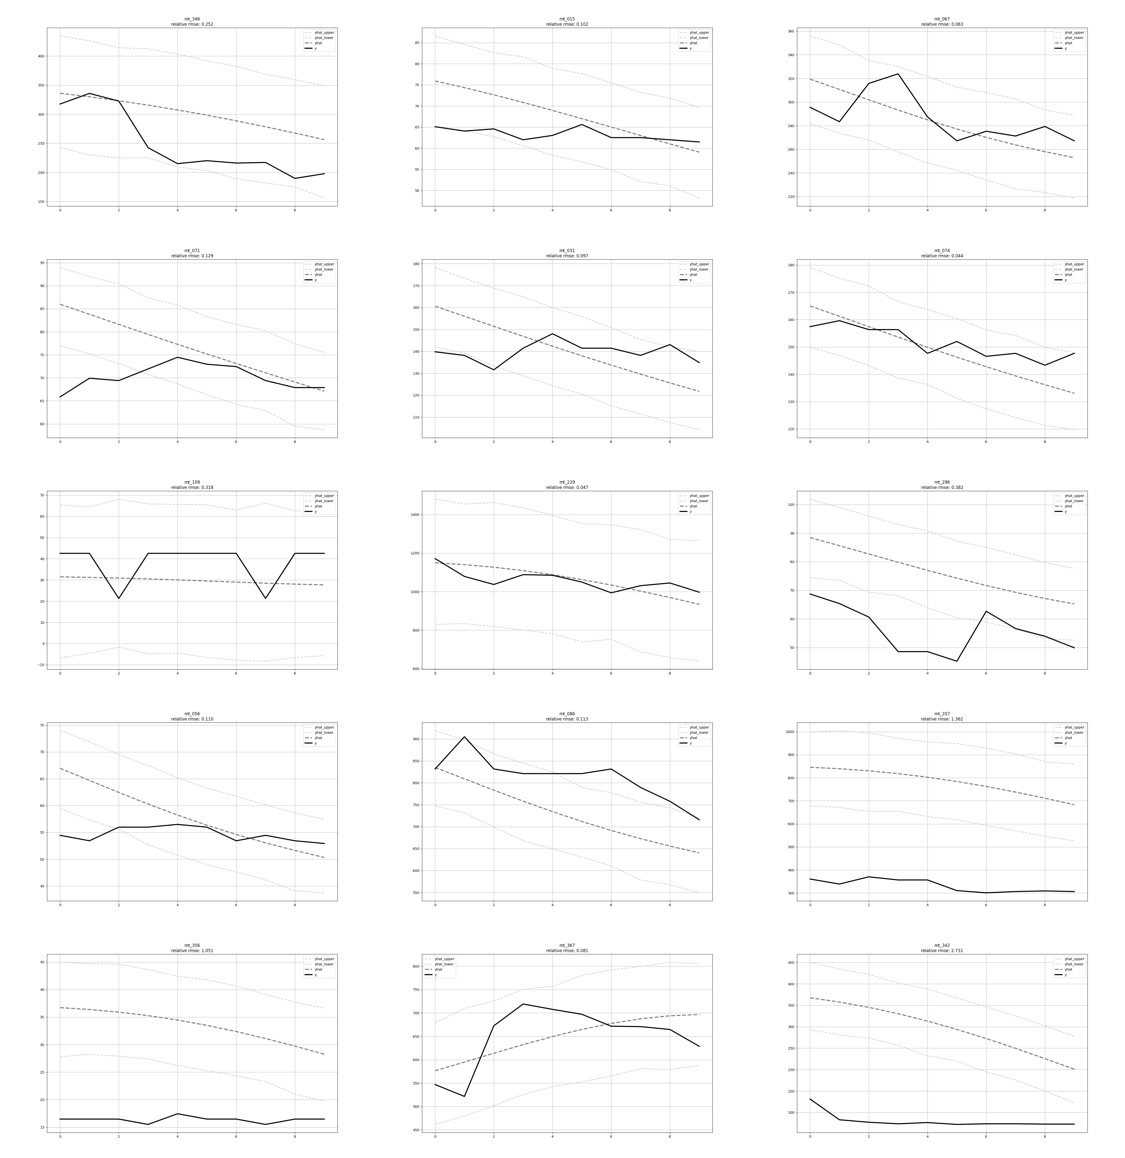

In [8]:
fig = hp.create_image_grid(list(graphs.values()), cols=3, rows=5, resize=0.25)
fig

In [25]:
from plotly import express as exp

def plot_samples(models, title=''):
    d = dict([(models[x].title, models[x].rmse_relative) for x in SAMPLE_COLS])
    d = pd.DataFrame.from_dict(d, orient='index')
    d.columns = ['series_name']
    d = d.reindex(list(sorted(d.index)))
    fig = exp.bar(d, title=title)
    fig.update_xaxes(title_text='Series')
    fig.update_yaxes(title_text='RMSE Relative')
    return fig

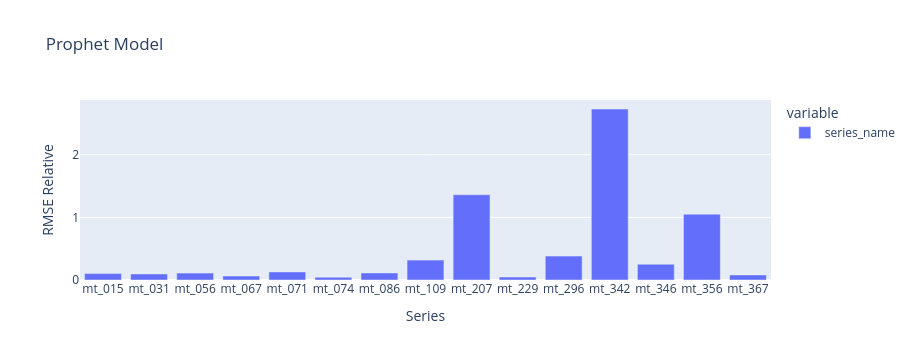

In [26]:
plot_samples(models, title='Prophet Model')

## Predictions on All Data

In [ ]:
%%time
models = dict()

for col in MODEL_DATA.columns.tolist():
    sl_train, sl_test = md.train_test(MODEL_DATA, col)
    model = ProphetModel(sl_train=sl_train, sl_test=sl_test, title=col)
    model.fit_predict()
    models[col] = copy(model)

07:39:19 - cmdstanpy - INFO - Chain [1] start processing
07:39:48 - cmdstanpy - INFO - Chain [1] done processing
07:39:53 - cmdstanpy - INFO - Chain [1] start processing
07:40:32 - cmdstanpy - INFO - Chain [1] done processing
07:40:38 - cmdstanpy - INFO - Chain [1] start processing
07:41:18 - cmdstanpy - INFO - Chain [1] done processing
07:41:24 - cmdstanpy - INFO - Chain [1] start processing
07:42:38 - cmdstanpy - INFO - Chain [1] done processing
07:42:43 - cmdstanpy - INFO - Chain [1] start processing
07:43:11 - cmdstanpy - INFO - Chain [1] done processing
07:43:16 - cmdstanpy - INFO - Chain [1] start processing
07:43:48 - cmdstanpy - INFO - Chain [1] done processing
07:43:53 - cmdstanpy - INFO - Chain [1] start processing
07:44:37 - cmdstanpy - INFO - Chain [1] done processing
07:44:42 - cmdstanpy - INFO - Chain [1] start processing
07:45:12 - cmdstanpy - INFO - Chain [1] done processing
07:45:17 - cmdstanpy - INFO - Chain [1] start processing
07:46:12 - cmdstanpy - INFO - Chain [1]

# Scratchpad